### ライブラリのimport

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_absolute_percentage_error

### データの読み込みと確認

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

### データの可視化

In [7]:
#price
print(np.max(train["price"]))
print(np.mean(train["price"]))
print(np.min(train["price"]))

96818
13468.724829289555
1004


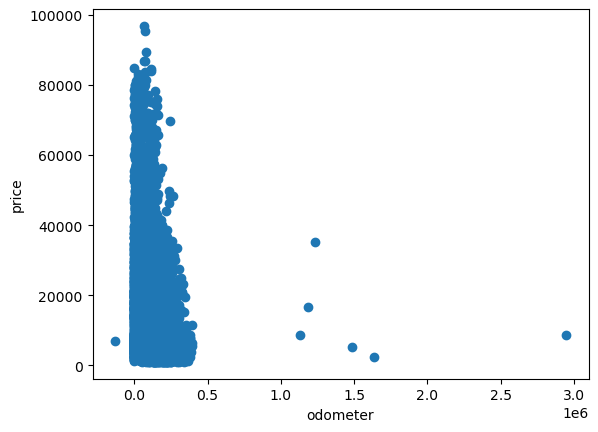

In [8]:
plt.scatter(train["odometer"], train["price"])
plt.xlabel("odometer")
plt.ylabel("price")
plt.show()

In [9]:
#車の状態ごとの価格
train.groupby("condition")["price"].agg(["mean", "count"])

,mean,count
condition,,
excellent,14662.392076,15219
fair,7210.345674,2404
good,11022.550674,6009
like new,16511.362730,3810
new,16274.418182,55
salvage,8640.685714,35


In [10]:
#製造メーカごとの平均価格
train.groupby("manufacturer")["price"].agg(["mean", "count"]).sort_values(by="mean", ascending=False)

,mean,count
manufacturer,,
ｍｅｒｃｅｄｅｓ－ｂｅｎｚ,29945.000000,1
land rover,28786.000000,2
ｄｏｄｇｅ,28109.200000,5
ｇｍｃ,27274.750000,4
ＲＡＭ,26850.500000,2
...,...,...
ＪＥＥＰ,4380.500000,2
MINI,3719.500000,2
FIAT,3238.333333,3


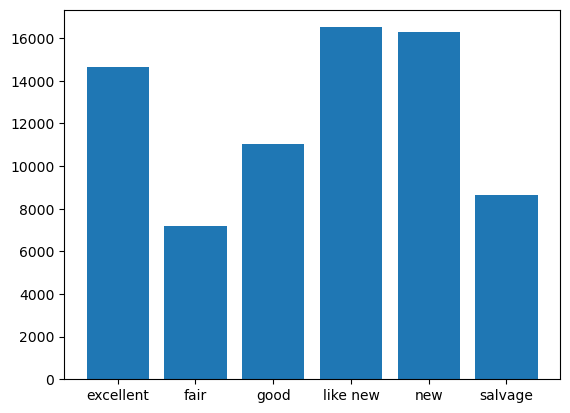

In [11]:
#状態ごとの平均価格
grouped = train.groupby("condition")["price"].mean()
plt.bar(grouped.index, grouped.values)
plt.show()

In [12]:
# 販売州の種類を確認
state_grouped = train.groupby("state")
for name, group in state_grouped:
    print(name)

ak
al
ar
az
ca
co
ct
dc
de
fl
ga
hi
ia
id
il
in
ks
ky
la
ma
md
me
mi
mn
mo
ms
mt
nc
nd
ne
nh
nj
nm
nv
ny
oh
ok
or
pa
ri
sc
sd
tn
tx
ut
va
vt
wa
wi
wv
wy


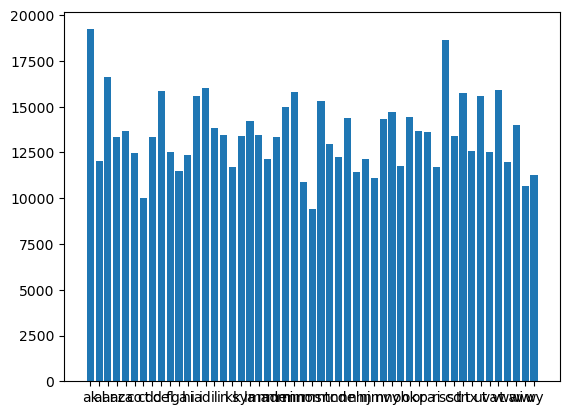

In [13]:
#販売州の状態ごとの平均価格
title_status_grouped = train.groupby("state")["price"].mean()
plt.bar(title_status_grouped.index, title_status_grouped.values)
plt.show()

In [14]:
#製造メーカのデータ確認
manufacturer_values_count = train["manufacturer"].nunique()
print("値の種類の数:", manufacturer_values_count)

manufacturer_grouped = train.groupby("manufacturer")
for name, group in manufacturer_grouped:
    print(name)

値の種類の数: 125
ACURA
AUDI
BMW
BUICK
CADILLAC
CHEVROLET
CHRYSLER
DODGE
FIAT
FORD
GMC
HONDA
HYUNDAI
INFINITI
JAGUAR
JEEP
KIA
LEXUS
LINCOLN
MAZDA
MERCEDES-BENZ
MERCURY
MINI
MITSUBISHI
NISSAN
PONTIAC
RAM
ROVER
SATURN
SUBARU
SUBΑRU
SΑTURN
TOYOTA
VOLKSWAGEN
VOLVO
acura
alfa-romeo
aston-martin
audi
bmw
buick
cadillac
chevrolet
chrysler
dodge
fiat
ford
gmc
honda
hyundai
infiniti
jaguar
jeep
kia
land rover
lexus
lexuѕ
lincoln
mazda
mercedes-benz
mercury
mini
mitsubishi
nissan
nisѕan
niѕsan
pontiac
porsche
ram
rover
saturn
subaru
toyota
toyotа
volkswagen
volvo
vоlkswagen
аcura
ᴄhrysler
ＡＣＵＲＡ
ＢＭＷ
ＢＵＩＣＫ
ＣＡＤＩＬＬＡＣ
ＣＨＥＶＲＯＬＥＴ
ＤＯＤＧＥ
ＦＯＲＤ
ＨＹＵＮＤＡＩ
ＪＥＥＰ
ＭＡＺＤＡ
ＭＥＲＣＵＲＹ
ＭＩＮＩ
ＭＩＴＳＵＢＩＳＨＩ
ＮＩＳＳＡＮ
ＲＡＭ
ＳＵＢＡＲＵ
ＴＯＹＯＴＡ
ＶＯＬＫＳＷＡＧＥＮ
ａｃｕｒａ
ａｕｄｉ
ｂｍｗ
ｂｕｉｃｋ
ｃａｄｉｌｌａｃ
ｃｈｅｖｒｏｌｅｔ
ｃｈｒｙｓｌｅｒ
ｄｏｄｇｅ
ｆｏｒｄ
ｇｍｃ
ｈｏｎｄａ
ｈｙｕｎｄａｉ
ｉｎｆｉｎｉｔｉ
ｊｅｅｐ
ｋｉａ
ｌｅｘｕｓ
ｍａｚｄａ
ｍｅｒｃｅｄｅｓ－ｂｅｎｚ
ｍｅｒｃｕｒｙ
ｍｉｔｓｕｂｉｓｈｉ
ｎｉｓｓａｎ
ｐｏｎｔｉａｃ
ｒａｍ
ｓａｔｕｒｎ
ｓｕｂａｒｕ
ｔｏｙｏｔａ
ｖｏｌｋｓｗａｇｅｎ
ｖｏｌｖｏ


### 前処理

In [15]:
# manufacturerカラムを整形
train['manufacturer'] = train['manufacturer'].str.replace(' ', '')  # スペースの除去
train['manufacturer'] = train['manufacturer'].str.upper()          # 大文字に統一
train['manufacturer'] = train['manufacturer'].str.normalize('NFKC')  # 半角に統一

test['manufacturer'] = test['manufacturer'].str.replace(' ', '')  # スペースの除去
test['manufacturer'] = test['manufacturer'].str.upper()          # 大文字に統一
test['manufacturer'] = test['manufacturer'].str.normalize('NFKC')  # 半角に統一

In [16]:
#ダミー変数に変換
train = pd.get_dummies(train, columns=["condition", "manufacturer", "state"])
test = pd.get_dummies(test, columns=["condition", "manufacturer", "state"])


In [17]:
train.head()

,id,region,year,cylinders,fuel,odometer,title_status,transmission,drive,size,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0,nashville,1949,6 cylinders,gas,115148,clean,manual,rwd,mid-size,...,0,0,0,0,0,0,0,0,0,0
1,1,state college,2013,8 cylinders,gas,172038,clean,automatic,rwd,full-size,...,0,0,0,0,0,0,0,0,0,0
2,2,wichita,1998,6 cylinders,gas,152492,clean,automatic,fwd,full-size,...,0,0,0,0,0,0,0,0,0,0
3,3,albany,2014,4 cylinders,gas,104118,clean,manual,fwd,mid-size,...,0,0,0,0,0,0,0,0,0,0
4,4,redding,2005,6 cylinders,gas,144554,clean,manual,fwd,mid-size,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#TOYOTAのデータを確認
train["manufacturer_TOYOTA"].head()

0    0
1    1
2    0
3    0
4    0
Name: manufacturer_TOYOTA, dtype: uint8

In [19]:
train[['condition_excellent', 'condition_fair', 'condition_good', 'condition_like new', 'condition_new', 'condition_salvage']].head()

,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


### データの分割

In [20]:
#priceは予測対象で学習に必要なため別途targetの変数に格納する
target = train["price"]
#学習させる特徴以外を削除
train = train.drop(columns=['id', 'region', 'year', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', "price"], axis=1)
test = test.drop(columns=['id', 'region', 'year', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color'], axis=1)

In [21]:
train.head()

,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,manufacturer_ACURA,manufacturer_ALFA-ROMEO,manufacturer_ASTON-MARTIN,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,115148,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,172038,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,152492,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,104118,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,144554,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(train, target, random_state = 82)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(20649, 104) (6883, 104) (20649,) (6883,)


### 学習と検証

In [23]:
#ランダムフォレストで学習
model = RFR(random_state=100)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=100)

In [24]:
#予測
pred = model.predict(X_valid)

In [25]:
#予測の中身確認
print(pred[:5])

[ 7363.78  7028.97  3563.11  9757.52 17677.86]


In [26]:
#評価
score = mean_absolute_percentage_error(y_valid, pred)
print(score*100)

79.80896718641884


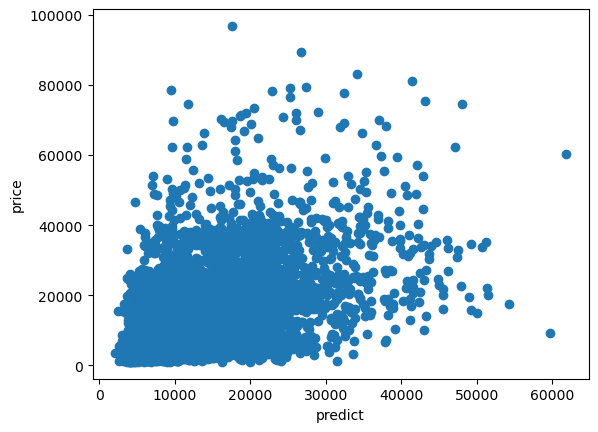

In [27]:
#横軸が予測結果、縦軸が正解価格
plt.scatter(pred, y_valid)
plt.xlabel("predict")
plt.ylabel("price")
plt.show()

### 提出ファイルの出力

In [28]:
predict = model.predict(test)

In [29]:
#submit_sample.csvを読み込み
submit = pd.read_csv("../data/submit_sample.csv", header=None)
submit.head()

,0,1
0,27532,14994.540583
1,27533,10004.210369
2,27534,8000.623545
3,27535,15062.223593
4,27536,8994.715270


In [30]:
#submit_sampleのpriceの数値部分を予測データpredictに変更する
submit[1] = predict
submit.head()

,0,1
0,27532,11871.85
1,27533,10892.06
2,27534,6715.02
3,27535,16147.14
4,27536,7925.45


In [31]:
#submission.csvでデータを保存(提出様式はindex=False, header=Noneとなります。)
submit.to_csv("../submit-file/20230726_submission.csv", index=False, header=None)